# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [2]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [2]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


In [3]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


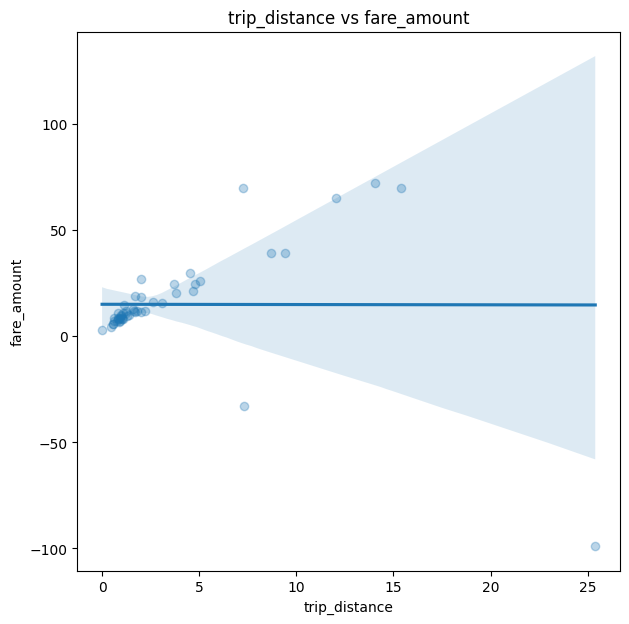

In [4]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [18]:
# Write your code

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [19]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [3]:
# Write your code

# Remove location out from scope
df_yellow_clean = df_yellow[(df_yellow['PULocationID'] <= 263) & (df_yellow['DOLocationID'] <= 263)]
df_green_clean = df_green[(df_green['PULocationID'] <= 263) & (df_green['DOLocationID'] <= 263)]

# Make new data set to each picture
df_yellow_PU = pd.DataFrame()
df_yellow_DO = pd.DataFrame()
df_green_PU = pd.DataFrame()
df_green_DO = pd.DataFrame()

# Add the lat and lng from df_yellow and df_green
df_yellow_PU = pd.merge(df_yellow_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', how='left')
df_yellow_DO = pd.merge(df_yellow_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID', how='left')
df_green_PU = pd.merge(df_green_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', how='left')
df_green_DO = pd.merge(df_green_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID', how='left')

# Remove unused collums
columns_to_keep = ['lat', 'lng']
df_yellow_PU = df_yellow_PU.loc[:, columns_to_keep]
df_yellow_DO = df_yellow_DO.loc[:, columns_to_keep]
df_green_PU = df_green_PU.loc[:, columns_to_keep]
df_green_DO = df_green_DO.loc[:, columns_to_keep]

# Get count of dropoff and pickup to heat map
df_yellow_PU = df_yellow_PU.value_counts(sort=False)
df_yellow_DO = df_yellow_DO.value_counts(sort=False)
df_green_PU = df_green_PU.value_counts(sort=False)
df_green_DO = df_green_DO.value_counts(sort=False)

# function to sort data into new DataFrame
def sortDataWithCount(row):
    temp = pd.DataFrame()
    for index in range(row.size):
        temp.loc[index, ['number', 'lat', 'lng']] = [row.iloc[index], row.index[index][0], row.index[index][1]]
    return temp

# Create the new column by applying the function to each row
df_yellow_PU_final = sortDataWithCount(df_yellow_PU)
df_yellow_DO_final = sortDataWithCount(df_yellow_DO)
df_green_PU_final = sortDataWithCount(df_green_PU)
df_green_DO_final = sortDataWithCount(df_green_DO)

# Make empty maps 
from keplergl import KeplerGl
map_yellow_PU = KeplerGl(height=600)
map_yellow_DO = KeplerGl(height=600)
map_green_PU = KeplerGl(height=600)
map_green_DO = KeplerGl(height=600)

# Add data to the map
map_yellow_PU.add_data(data=df_yellow_PU_final, name='taxi_yellow_pickup')
map_yellow_DO.add_data(data=df_yellow_DO_final, name='taxi_yellow_pickup')
map_green_PU.add_data(data=df_green_PU_final, name='taxi_yellow_pickup')
map_green_DO.add_data(data=df_green_DO_final, name='taxi_yellow_pickup')

# Display a map where lighter-colored dots indicate higher activity levels
map_yellow_PU
#map_yellow_DO
#map_green_PU
#map_green_DO



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'taxi_yellow_pickup': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [21]:
# Write your code

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert the pickup datetime columns to datetime type
df_yellow['ds'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['ds'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Assuming 'trip_distance' is the target variable for prediction
df_yellow['y'] = df_yellow['trip_distance']
df_green['y'] = df_green['trip_distance']

# Fit the models on the training data
model_yellow = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_yellow.fit(df_yellow[['ds', 'y']])

model_green = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_green.fit(df_green[['ds', 'y']])

# Create future dataframes for predictions
future_yellow = model_yellow.make_future_dataframe(periods=2)  # Predicting the next 2 days
future_green = model_green.make_future_dataframe(periods=2)    # Predicting the next 2 days

# Make predictions
forecast_yellow = model_yellow.predict(future_yellow)
forecast_green = model_green.predict(future_green)

# Plot the forecasts and components
fig1_yellow = model_yellow.plot(forecast_yellow)
fig1_yellow.savefig('forecast_yellow.png')

fig1_green = model_green.plot(forecast_green)
fig1_green.savefig('forecast_green.png')

fig2_yellow = model_yellow.plot_components(forecast_yellow)
fig2_yellow.savefig('components_yellow.png')

fig2_green = model_green.plot_components(forecast_green)
fig2_green.savefig('components_green.png')

# Evaluate the model performance using MAE and RMSE
yellow_mae = mean_absolute_error(df_yellow['y'], forecast_yellow['yhat'])
yellow_rmse = np.sqrt(mean_squared_error(df_yellow['y'], forecast_yellow['yhat']))
green_mae = mean_absolute_error(df_green['y'], forecast_green['yhat'])
green_rmse = np.sqrt(mean_squared_error(df_green['y'], forecast_green['yhat']))

# Print MAE and RMSE
print(f"Yellow Taxi MAE: {yellow_mae}, RMSE: {yellow_rmse}")
print(f"Green Taxi MAE: {green_mae}, RMSE: {green_rmse}")

# Perform and plot cross-validation
df_cv_yellow = cross_validation(model_yellow, initial='2 days', period='2 days', horizon='2 days')  # Reduced to 2 days
df_p_yellow = performance_metrics(df_cv_yellow)
plot_cross_validation_metric(df_cv_yellow, metric='mape')

df_cv_green = cross_validation(model_green, initial='2 days', period='2 days', horizon='2 days')  # Reduced to 2 days
df_p_green = performance_metrics(df_cv_green)
plot_cross_validation_metric(df_cv_green, metric='mape')


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.